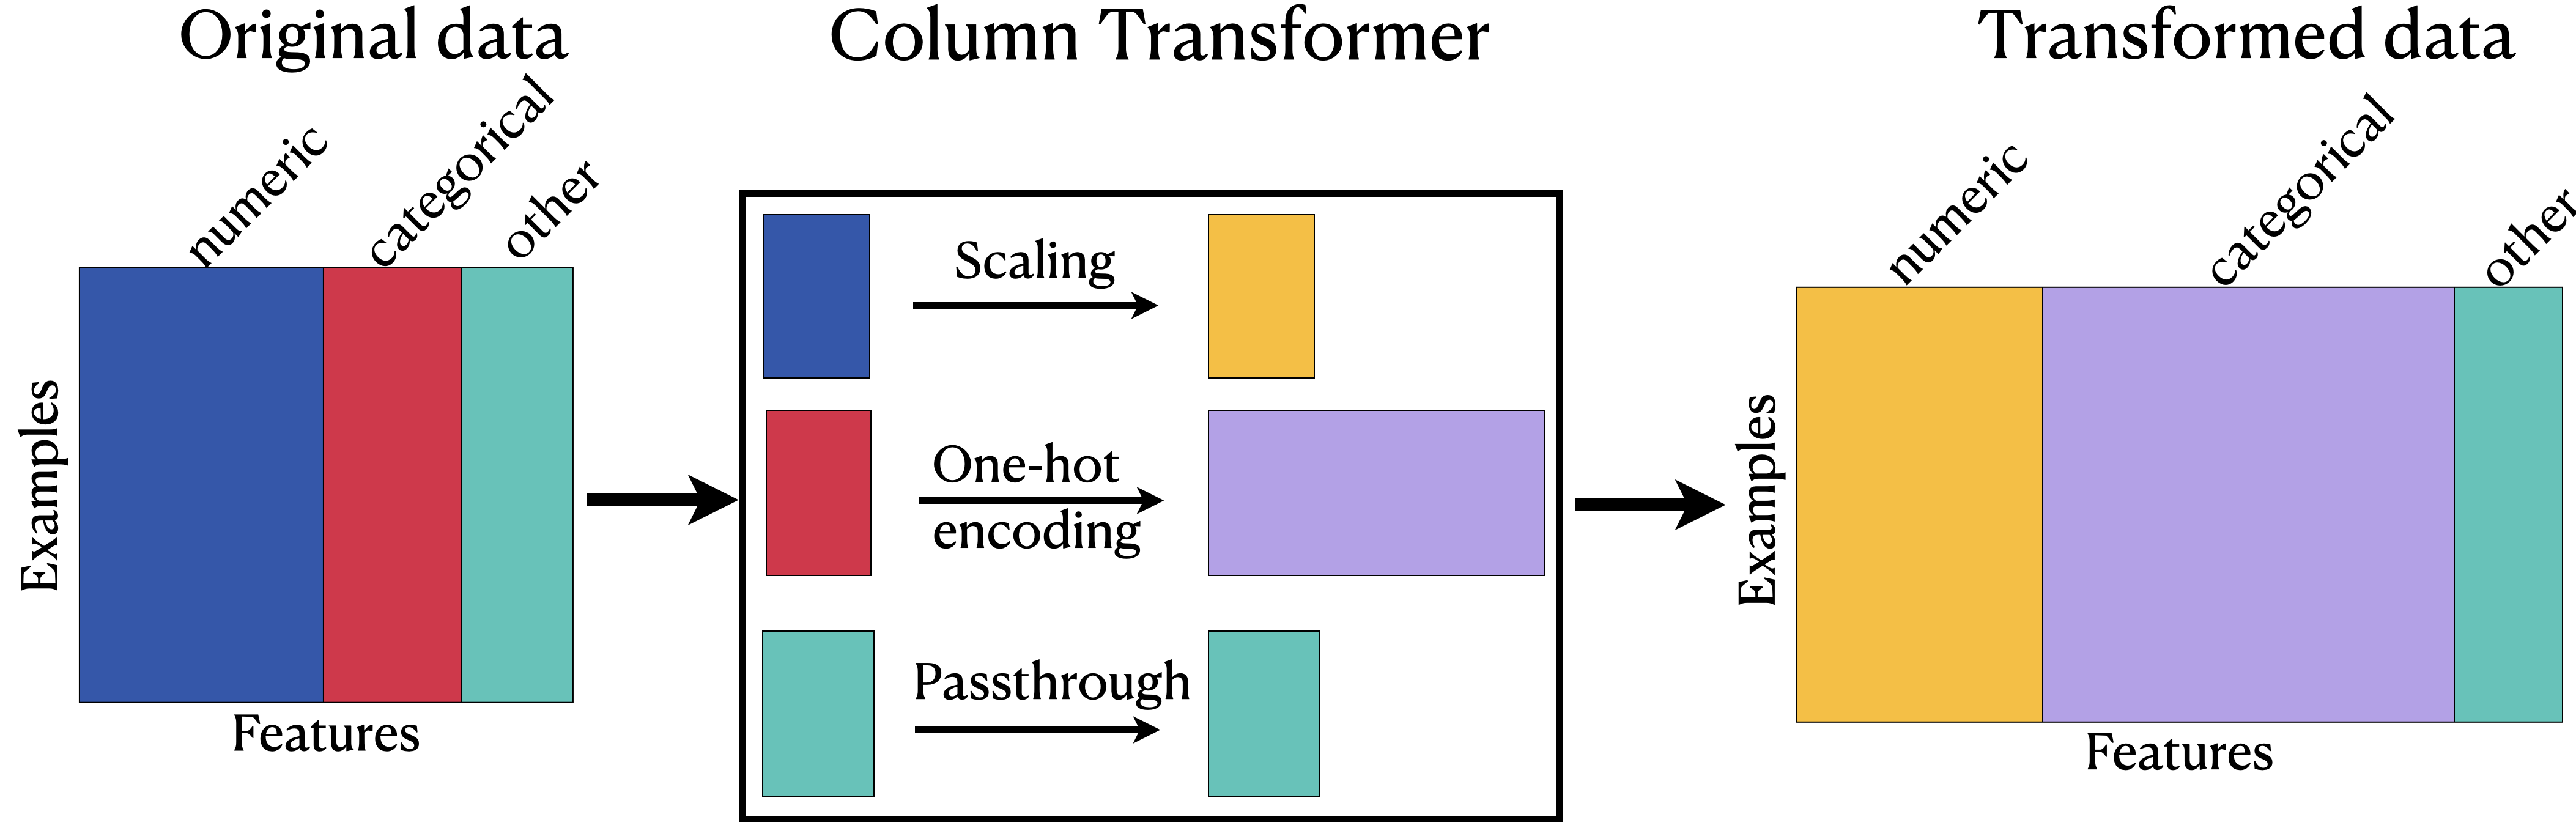

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('covid_toy.csv')

In [3]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [4]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.3)

In [6]:
X_train

,age,gender,fever,cough,city
89,46,Male,103.0,Strong,Bangalore
58,23,Male,98.0,Strong,Mumbai
90,59,Female,99.0,Strong,Delhi
36,38,Female,101.0,Mild,Bangalore
11,65,Female,98.0,Mild,Mumbai
...,...,...,...,...,...
12,25,Female,99.0,Strong,Kolkata
22,71,Female,98.0,Strong,Kolkata
71,75,Female,104.0,Strong,Delhi
47,18,Female,104.0,Mild,Bangalore


# Long method

In [7]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(70, 1)

In [8]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(70, 1)

In [9]:
print('City')
print(df['city'].value_counts())
print('Gender')
print(df['gender'].value_counts())

City
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: city, dtype: int64
Gender
Female    59
Male      41
Name: gender, dtype: int64


In [10]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(70, 1)

In [11]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

(70, 4)

In [12]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(70, 1)

In [13]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(70, 7)

# Column TransFromer

In [14]:
from sklearn.compose import ColumnTransformer

In [15]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [16]:
transformer.fit_transform(X_train)

array([[103.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  46.        ],
       [ 98.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   1.        ,  23.        ],
       [ 99.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  59.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  38.        ],
       [ 98.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  65.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  83.        ],
       [100.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  13.        ],
       [ 98.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  26.        ],
       [101.        ,   0.        ,   0.        ,   1.        ,
          0.    

In [17]:
transformer.transform(X_test)

array([[102.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ,  74.        ],
       [103.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  50.        ],
       [100.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  47.        ],
       [ 99.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  14.        ],
       [100.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  19.        ],
       [100.66129032,   1.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  79.        ],
       [103.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  16.        ],
       [104.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ,  44.        ],
       [104.        ,   0.        ,   1.        ,   0.        ,
          1.    

In [18]:
print(transformer.fit_transform(X_train).shape)
print(transformer.transform(X_test).shape)

(70, 7)
(30, 7)


In [19]:
print('X_Train')
print(X_train)

print('X_Test')
print(X_test)

X_Train
    age  gender  fever   cough       city
89   46    Male  103.0  Strong  Bangalore
58   23    Male   98.0  Strong     Mumbai
90   59  Female   99.0  Strong      Delhi
36   38  Female  101.0    Mild  Bangalore
11   65  Female   98.0    Mild     Mumbai
..  ...     ...    ...     ...        ...
12   25  Female   99.0  Strong    Kolkata
22   71  Female   98.0  Strong    Kolkata
71   75  Female  104.0  Strong      Delhi
47   18  Female  104.0    Mild  Bangalore
32   34  Female  101.0  Strong      Delhi

[70 rows x 5 columns]
X_Test
    age  gender  fever   cough       city
34   74    Male  102.0    Mild     Mumbai
39   50  Female  103.0    Mild    Kolkata
52   47  Female  100.0  Strong  Bangalore
80   14  Female   99.0    Mild     Mumbai
8    19  Female  100.0  Strong  Bangalore
94   79    Male    NaN  Strong    Kolkata
85   16  Female  103.0    Mild  Bangalore
49   44    Male  104.0    Mild     Mumbai
28   16    Male  104.0    Mild    Kolkata
3    31  Female   98.0    Mild    Kolk

In [20]:
print(X_train.shape)
print(X_test.shape)


(70, 5)
(30, 5)
